In [1]:
import pickle
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_folder = 'Q:\\Personal\\Irina\\projects\\isttc\\results\\monkey\\'

### Load data

In [3]:
csv_data_file_pfdl = results_folder + 'data_pfdl_fixon.csv'
with open(csv_data_file_pfdl, newline='') as f:
    reader = csv.reader(f)
    sua_list_pfdl = list(reader)
    
n_spike_trains_pfdl = len(sua_list_pfdl)
print('N spike_trains in PFdl fixON {}'.format(n_spike_trains_pfdl))

N spike_trains in PFdl fixON 47339


In [4]:
csv_data_file_pfp = results_folder + 'data_pfp_fixon.csv'
with open(csv_data_file_pfp, newline='') as f:
    reader = csv.reader(f)
    sua_list_pfp = list(reader)

n_spike_trains_pfp = len(sua_list_pfp)
print('N spike_trains in PFp fixON {}'.format(n_spike_trains_pfp))

N spike_trains in PFp fixON 43677


### Preprocess

In [5]:
def get_spikes_per_interval(sua_list, area_name, interval=None, verbose=False):
    unit_id_l, trial_id_l, condition_id_l, spike_trains_l = [], [], [], []
    for trial in sua_list:
        if interval is None:
            unit_id_l.append(trial[0])
            trial_id_l.append(trial[1])
            condition_id_l.append(trial[2])
            spike_trains_l.append(trial[3:])
        else:
            spike_train = trial[3:]
            spike_train_interval = [spike for spike in spike_train if int(spike) >=interval[0] and int(spike) <= interval[1]]
            if len(spike_train_interval) >= 1:
                unit_id_l.append(trial[0])
                trial_id_l.append(trial[1])
                condition_id_l.append(trial[2])
                spike_trains_l.append(spike_train_interval)
            else:
                if verbose:
                    print('Unit {}, trial {}: NO spikes in this interval'.format(trial[0], trial[1]))
    
    summary_df = pd.DataFrame(np.vstack((unit_id_l, trial_id_l, condition_id_l)).T, 
                                             columns=['unit_id', 'trial_id', 'condition_id'])
    summary_df['area'] = area_name
    return summary_df, spike_trains_l, unit_id_l, trial_id_l, condition_id_l

In [6]:
pfdl_summary_df, spike_trains_pfdl_l, _, _, _ = get_spikes_per_interval(sua_list_pfdl, 'pfdl', interval=None)
pfp_summary_df, spike_trains_pfp_l, _, _, _ = get_spikes_per_interval(sua_list_pfp, 'pfp', interval=None)

In [7]:
pfdl_summary_fix_df, spike_trains_pfdl_fix_l, unit_id_pfdl_fix_l, trial_id_pfdl_fix_l, condition_id_pfdl_fix_l = get_spikes_per_interval(sua_list_pfdl, 
                                                                                                                             'pfdl', 
                                                                                                                             interval=[0,1500])
pfp_summary_fix_df, spike_trains_pfp_fix_l, unit_id_pfp_fix_l, trial_id_pfp_fix_l, condition_id_pfp_fix_l = get_spikes_per_interval(sua_list_pfp, 
                                                                                                                        'pfp', 
                                                                                                                        interval=[0,1500])

In [8]:
pfdl_n_trials_per_unit = pfdl_summary_df.groupby(by=['unit_id','area'], as_index=False)['trial_id'].count()
pfdl_n_trials_per_unit.rename(columns={'trial_id': 'n_trials_all_rec'}, inplace=True)

pfdl_n_trials_per_unit_fix = pfdl_summary_fix_df.groupby(by=['unit_id','area'], as_index=False)['trial_id'].count()
pfdl_n_trials_per_unit_fix.rename(columns={'trial_id': 'n_trials_fix'}, inplace=True)

pfdl_n_trials_per_unit_merged = pfdl_n_trials_per_unit.merge(pfdl_n_trials_per_unit_fix, on=['unit_id', 'area'], how='left')
pfdl_n_trials_per_unit_merged

,unit_id,area,n_trials_all_rec,n_trials_fix
0,0,pfdl,92,92.0
1,1,pfdl,92,41.0
2,10,pfdl,81,81.0
3,100,pfdl,69,68.0
4,101,pfdl,102,94.0
...,...,...,...,...
539,95,pfdl,85,54.0
540,96,pfdl,106,106.0
541,97,pfdl,93,80.0
542,98,pfdl,77,64.0


In [9]:
pfp_n_trials_per_unit = pfp_summary_df.groupby(by=['unit_id','area'], as_index=False)['trial_id'].count()
pfp_n_trials_per_unit.rename(columns={'trial_id': 'n_trials_all_rec'}, inplace=True)

pfp_n_trials_per_unit_fix = pfp_summary_fix_df.groupby(by=['unit_id','area'], as_index=False)['trial_id'].count()
pfp_n_trials_per_unit_fix.rename(columns={'trial_id': 'n_trials_fix'}, inplace=True)

pfp_n_trials_per_unit_merged = pfp_n_trials_per_unit.merge(pfp_n_trials_per_unit_fix, on=['unit_id', 'area'], how='left')
pfp_n_trials_per_unit_merged

,unit_id,area,n_trials_all_rec,n_trials_fix
0,0,pfp,97,85
1,1,pfp,38,17
2,10,pfp,88,22
3,100,pfp,67,67
4,101,pfp,32,30
...,...,...,...,...
538,95,pfp,119,54
539,96,pfp,118,22
540,97,pfp,95,94
541,98,pfp,37,18


In [10]:
pfdl_n_trials_per_unit_merged.to_pickle(results_folder + 'pfdl_n_trials_per_unit_merged_fixon.pkl')
pfp_n_trials_per_unit_merged.to_pickle(results_folder + 'pfp_n_trials_per_unit_merged_fixon.pkl')

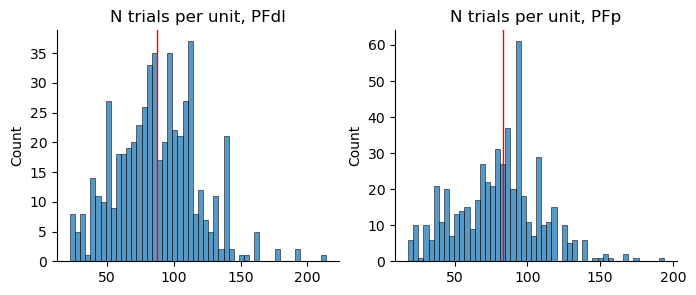

In [15]:
# plot
fig, axes = plt.subplots(1, 2, figsize=(8,3))

sns.histplot(ax=axes[0], x=pfdl_n_trials_per_unit_merged['n_trials_all_rec'].values, 
             bins=50, stat='count')
sns.histplot(ax=axes[1], x=pfp_n_trials_per_unit_merged['n_trials_all_rec'].values, 
             bins=50, stat='count')

axes[0].set_title('N trials per unit, PFdl')
axes[1].set_title('N trials per unit, PFp')

axes[0].axvline(x=np.nanmedian(pfdl_n_trials_per_unit_merged['n_trials_all_rec'].values), lw=1, color='red')
axes[1].axvline(x=np.nanmedian(pfp_n_trials_per_unit_merged['n_trials_all_rec'].values), lw=1, color='red')

sns.despine()

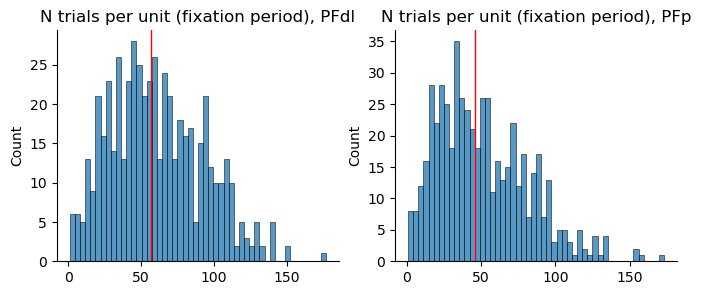

In [14]:
# plot
fig, axes = plt.subplots(1, 2, figsize=(8,3))

sns.histplot(ax=axes[0], x=pfdl_n_trials_per_unit_merged['n_trials_fix'].values, 
             bins=50, stat='count')
sns.histplot(ax=axes[1], x=pfp_n_trials_per_unit_merged['n_trials_fix'].values, 
             bins=50, stat='count')

axes[0].set_title('N trials per unit (fixation period), PFdl')
axes[1].set_title('N trials per unit (fixation period), PFp')

axes[0].axvline(x=np.nanmedian(pfdl_n_trials_per_unit_merged['n_trials_fix'].values), lw=1, color='red')
axes[1].axvline(x=np.nanmedian(pfp_n_trials_per_unit_merged['n_trials_fix'].values), lw=1, color='red')

sns.despine()

### Write filtered spikes to csv

In [16]:
def write_csv(output_filename, unit_id_l, trial_id_l, condition_id_l, spike_trains_l, verbose=True):
    with open(output_filename, 'a', newline='') as f:
        writer = csv.writer(f)
        for unit_row_n, spike_train in enumerate(spike_trains_l):
            if verbose:
                print('Writing unit {}'.format(unit_id_l[unit_row_n]))
                # print(spike_train)
            #spikes_l = spike_train.tolist()
            row = [unit_id_l[unit_row_n]] + [trial_id_l[unit_row_n]] + [condition_id_l[unit_row_n]] + spike_train
            writer.writerow(row)

In [17]:
output_filename_pfdl = results_folder + 'data_pfdl_fixon_1500ms_fixation.csv'
write_csv(output_filename_pfdl, unit_id_pfdl_fix_l, trial_id_pfdl_fix_l, condition_id_pfdl_fix_l, spike_trains_pfdl_fix_l, verbose=False)

In [18]:
output_filename_pfp = results_folder + 'data_pfp_fixon_1500ms_fixation.csv'
write_csv(output_filename_pfp, unit_id_pfp_fix_l, trial_id_pfp_fix_l, condition_id_pfp_fix_l, spike_trains_pfp_fix_l, verbose=False)